In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
data_dir = 'Data/cell_images/'

In [3]:
data_dir

'Data/cell_images/'

In [4]:
#os.listdir is used to list all the directories(folders) inside given directory
os.listdir(data_dir)

['test', 'train']

In [5]:
train_path = data_dir + 'train/'

In [6]:
test_path = data_dir + 'test/'

In [7]:
train_path

'Data/cell_images/train/'

In [8]:
test_path

'Data/cell_images/test/'

In [9]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [10]:
para_images = os.listdir(train_path + 'parasitized/')

In [11]:
#para_images - to list all images
para_images[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [12]:
para_cell_path = train_path + 'parasitized/' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [13]:
para_cell_path

'Data/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [14]:
type(para_cell_path)

str

In [15]:
from matplotlib.image import imread

In [16]:
para_cell = imread(para_cell_path)
#it converts an image_path(type-str) to numpy array

In [17]:
type(para_cell)

numpy.ndarray

In [18]:
para_cell.ndim

3

In [19]:
para_cell.shape

(148, 142, 3)

In [20]:
para_cell

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

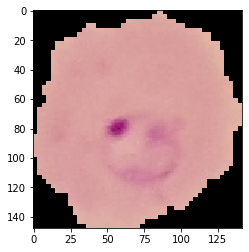

In [21]:
#to show numpy array we use plt.imshow function.
plt.imshow(para_cell)

In [22]:
#now getting all image path and then converting them to numpy array to get different dimensions of images
#it takes few second because it passes through all images in parasitized folders

dim1=[] #for first dimension(width)
dim2=[] #for second dimension(height)
dim3=[] #for third dimension(color channel,3 for real image, 1 for gray-scale image)

for single_img in os.listdir(train_path + 'parasitized/'):
    img = imread(train_path + 'parasitized/' + single_img)
    w,h,c = img.shape
    dim1.append(w)
    dim2.append(h)
    dim3.append(c)
#this block of code helps to later calculate mean of image size as we get different sizes of images in real world.

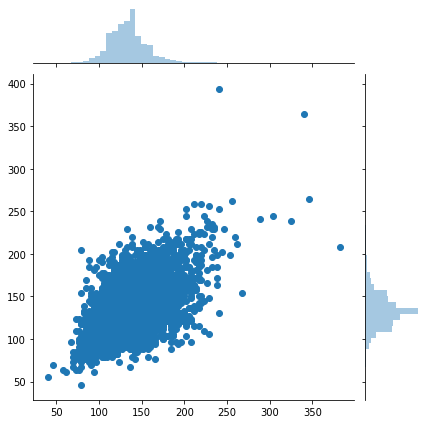

In [23]:
#dim1
sns.jointplot(dim1,dim2)

In [24]:
#since the dimension for each image is different we will take mean of different dimensions of images

In [25]:
np.mean(dim1)

134.360205144643

In [26]:
np.mean(dim2)

133.66447632021797

In [27]:
#setting image shape to 130*130*3
img_shape = (130,130,3)

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
img_gen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True)

In [30]:
imgg = img_gen.random_transform(para_cell)

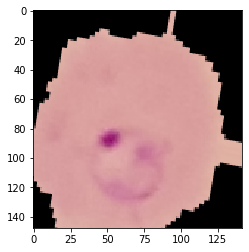

In [31]:
plt.imshow(imgg)
#image after randomly transformed

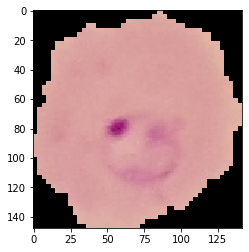

In [32]:
plt.imshow(para_cell)
#orginal image

In [33]:
train_path

'Data/cell_images/train/'

In [34]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [35]:
test_path

'Data/cell_images/test/'

In [36]:
img_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [37]:
img_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [38]:
img_shape[:2]

(130, 130)

In [39]:
batch_size = 32

In [40]:
train_img_generator = img_gen.flow_from_directory(directory=train_path,
                                                  target_size=img_shape[:2],
                                                  class_mode='binary',
                                                  color_mode='rgb',
                                                  batch_size=batch_size)#shuffle is true by default.

Found 24958 images belonging to 2 classes.


In [41]:
test_img_generator = img_gen.flow_from_directory(directory=test_path,
                                                 target_size=img_shape[:2],
                                                 class_mode='binary',
                                                 color_mode='rgb',
                                                 shuffle=False,
                                                 batch_size=batch_size)#we don't want to shuffle our labels in testing data

Found 2600 images belonging to 2 classes.


In [42]:
train_img_generator.class_indices

{'parasitized': 0, 'uninfected': 1}

In [61]:
train_img_generator.classes

array([0, 0, 0, ..., 1, 1, 1])

Model Building

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=img_shape,padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 130, 130, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 65, 65, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 65, 65, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

In [45]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
early_stop = EarlyStopping(monitor='val_loss',patience=2,mode='min')

In [47]:
model.fit_generator(generator=train_img_generator,epochs=20,callbacks=[early_stop],validation_data=test_img_generator)

c:\users\gaurav\anaconda3\envs\deeplnenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
780/780 [==============================] - 290s 371ms/step - loss: 1.3659 - accuracy: 0.5294 - val_loss: 0.6874 - val_accuracy: 0.5338
Epoch 2/20
780/780 [==============================] - 321s 412ms/step - loss: 0.6794 - accuracy: 0.5734 - val_loss: 0.6763 - val_accuracy: 0.5677
Epoch 3/20
780/780 [==============================] - 338s 433ms/step - loss: 0.6751 - accuracy: 0.5886 - val_loss: 0.6645 - val_accuracy: 0.5996
Epoch 4/20
780/780 [==============================] - 339s 434ms/step - loss: 0.6684 - accuracy: 0.5983 - val_loss: 0.6477 - val_accuracy: 0.6250
Epoch 5/20
780/780 [==============================] - 345s 442ms/step - loss: 0.6602 - accuracy: 0.6154 - val_loss: 0.6475 - val_accuracy: 0.6277
Epoch 6/20
780/780 [==============================] - 346s 443ms/step - loss: 0.6623 - accuracy: 0.6107 - val_loss: 0.6456 - val_accuracy: 0.6212
Epoch 7/20
780/780 [==============================] - 340s 436ms/step - loss: 0.6525 - accuracy: 0.6240 - val_loss: 0.6422 -

In [48]:
loss = pd.DataFrame(model.history.history)

In [49]:
loss

,loss,accuracy,val_loss,val_accuracy
0,1.365932,0.529409,0.687389,0.533846
1,0.679441,0.573403,0.676272,0.567692
2,0.675126,0.588589,0.664491,0.599615
3,0.668401,0.598285,0.647674,0.625000
4,0.660225,0.615354,0.647498,0.627692
5,0.662344,0.610706,0.645583,0.621154
6,0.652467,0.624008,0.642181,0.633077
7,0.649624,0.627254,0.630636,0.653846
8,0.644096,0.634025,0.647506,0.635000
9,0.544129,0.723616,0.245033,0.912692


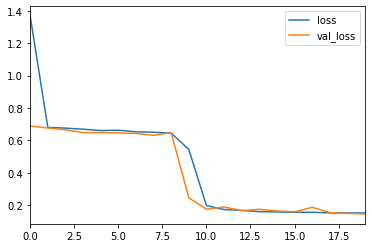

In [50]:
loss[['loss','val_loss']].plot()

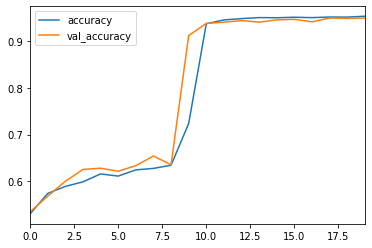

In [51]:
loss[['accuracy','val_accuracy']].plot()

In [52]:
model.evaluate_generator(test_img_generator)

c:\users\gaurav\anaconda3\envs\deeplnenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.1500813215970993, 0.9503846168518066]

In [54]:
model.metrics_names

['loss', 'accuracy']

In [55]:
pred = model.predict_generator(test_img_generator)

c:\users\gaurav\anaconda3\envs\deeplnenv\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [56]:
pred

array([[5.2630901e-04],
       [1.8340349e-04],
       [2.5567412e-04],
       ...,
       [9.5242274e-01],
       [9.9076271e-01],
       [9.6742809e-01]], dtype=float32)

In [59]:
#if the prediction is more than 50% then predict it is true i.e 1(uninfected)
#similarly if the prediction is less than or equal to 50% then predict it as false i.e 0(parasitized)
predd = pred > 0.5
predd

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [60]:
len(pred)

2600

In [62]:
test_img_generator.classes

array([0, 0, 0, ..., 1, 1, 1])

In [63]:
test_img_generator.class_indices

{'parasitized': 0, 'uninfected': 1}

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
print(classification_report(test_img_generator.classes,predd))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1300
           1       0.93      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [66]:
print(confusion_matrix(test_img_generator.classes,predd))

[[1206   94]
 [  38 1262]]


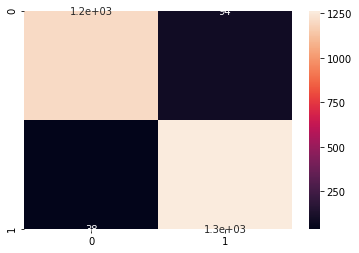

In [68]:
sns.heatmap(confusion_matrix(test_img_generator.classes,predd),annot=True)

In [70]:
#for new data

para_cell_path

'Data/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [71]:
#to load image we can also keras api
from tensorflow.keras.preprocessing import image

In [85]:
img = image.load_img(para_cell_path,target_size=(130,130,3))

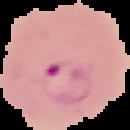

In [86]:
img

In [87]:
type(img)

PIL.Image.Image

In [88]:
img_arr = image.img_to_array(img)

In [89]:
img_arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [95]:
img_arr.shape
#shape should be of (1,130,130,3) because our model expect the shape of image in this shape , 1 represents the batch size

(130, 130, 3)

In [91]:
im = img_arr.reshape(1,130,130,3)
#or im = np.expand_dims(img_arr,axis=0)

In [93]:
model.predict(im)

array([[0.00649691]], dtype=float32)

In [94]:
model.predict_classes(im)

c:\users\gaurav\anaconda3\envs\deeplnenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]])